# MACD
This notebook use MACD strategy to backtest the performance

In [4]:
# Run it when crypto-backtest is updated, and then restart the kernel
!pip uninstall crypto-backtest -y
!pip install git+https://github.com/BullionBear/crypto-backtest.git

Found existing installation: crypto-backtest 0.0.17
Uninstalling crypto-backtest-0.0.17:
  Successfully uninstalled crypto-backtest-0.0.17
  Cloning https://github.com/BullionBear/crypto-backtest.git to /tmp/pip-req-build-y1alvi9l
  Running command git clone --filter=blob:none --quiet https://github.com/BullionBear/crypto-backtest.git /tmp/pip-req-build-y1alvi9l
  Resolved https://github.com/BullionBear/crypto-backtest.git to commit fab45491f4d038eb59799d1e9b35b4399124f230
  Preparing metadata (setup.py) ... done
  Created wheel for crypto-backtest: filename=crypto_backtest-0.0.19-py3-none-any.whl size=10244 sha256=9a2c239629c073304a41911f819dc117ee9c80ca87146955d01a58bce220a694
  Stored in directory: /tmp/pip-ephem-wheel-cache-5hl80n68/wheels/14/d1/5f/193347d44b51670dd287000ac535cdb7a8fc3f84e426532382
Successfully built crypto-backtest

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [220]:
import backtest
backtest.__version__

'develop_0.0.17+'

In [221]:
from backtest.components.core import ZipKLineIterator
from backtest.components import KLineMarket

from datetime import datetime, timezone

start_time = datetime(2023, 8, 1, tzinfo=timezone.utc).timestamp() * 1000
end_time = datetime(2023, 8, 15, tzinfo=timezone.utc).timestamp() * 1000
data_source = '/home/yite/crypto_data/binance/data'
kline_iterator = ZipKLineIterator('BTCUSDT', start_time, end_time, data_source)
# market = KLineMarket(kline_iterator)

In [222]:
df = kline_iterator.to_dataframe()
df.head()

,open,high,low,close,volume,open_time,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,29232.26,29288.20,29210.99,29283.96,720.85463,1690848000000,1690851599999,2.107947e+07,17954,341.10168,9.975408e+06,0
1,29283.96,29347.16,29169.37,29200.54,973.96678,1690851600000,1690855199999,2.850160e+07,26866,457.28798,1.338138e+07,0
2,29200.53,29218.74,28720.00,28933.22,5165.01282,1690855200000,1690858799999,1.495571e+08,88074,2152.09462,6.230125e+07,0
3,28933.22,28951.12,28813.86,28835.00,1813.18905,1690858800000,1690862399999,5.238132e+07,37227,797.90100,2.305322e+07,0
4,28835.01,28928.34,28803.50,28866.00,1752.08768,1690862400000,1690865999999,5.056954e+07,31403,832.45833,2.402522e+07,0


In [223]:
import talib
help(talib.MACD)

Help on function MACD in module talib._ta_lib:

MACD(real, fastperiod=-2147483648, slowperiod=-2147483648, signalperiod=-2147483648)
    MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])
    
    Moving Average Convergence/Divergence (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist



In [224]:
import pandas as pd

# Convert 'open_time' from Linux timestamp to datetime
df['date'] = pd.to_datetime(df['open_time']/1000, unit='ms')
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['close'], fastperiod=10, slowperiod=40, signalperiod=9)


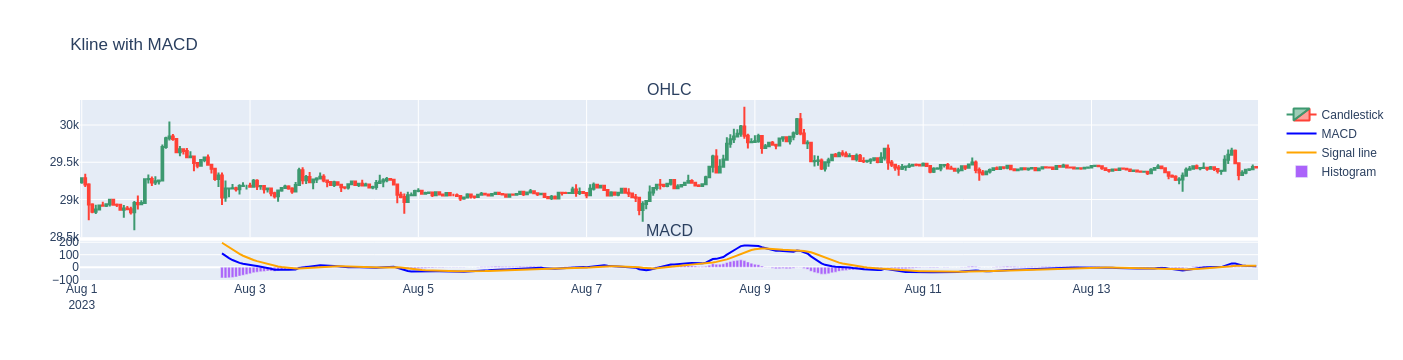

In [225]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import talib

# Sample DataFrame 'df' creation skipped for brevity

# Convert Unix timestamps to datetime
df['date'] = pd.to_datetime(df['open_time'], unit='ms')

# Calculate MACD
macd, macdsignal, macdhist = talib.MACD(df['close'], fastperiod=16, slowperiod=32, signalperiod=10)

# Create subplots: one for the candlestick chart, another for the MACD
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02, subplot_titles=('OHLC', 'MACD'), row_width=[0.2, 0.7])

# Add the candlestick plot
fig.add_trace(go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name="Candlestick"), row=1, col=1)

# Add MACD lines
fig.add_trace(go.Scatter(x=df['date'], y=macd, line=dict(width=2, color='blue'), name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=macdsignal, line=dict(width=2, color='orange'), name='Signal line'), row=2, col=1)

# Add MACD histogram (difference between MACD and signal)
fig.add_trace(go.Bar(x=df['date'], y=macdhist, name='Histogram'), row=2, col=1)

# Update layout
fig.update_layout(title_text="Kline with MACD", xaxis_rangeslider_visible=False)
fig.show()

In [226]:
df.tail()

,open,high,low,close,volume,open_time,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,date,macd,macdsignal,macdhist
331,29330.01,29392.42,29322.00,29360.54,655.09177,1692039600000,1692043199999,1.923234e+07,20306,334.45013,9.818094e+06,0,2023-08-14 19:00:00,23.122539,29.833253,-6.710715
332,29360.54,29400.83,29338.12,29400.83,572.37420,1692043200000,1692046799999,1.681250e+07,16776,271.91889,7.987289e+06,0,2023-08-14 20:00:00,16.342618,27.135126,-10.792508
333,29400.82,29408.76,29383.00,29405.13,335.28568,1692046800000,1692050399999,9.854875e+06,12549,108.53302,3.190116e+06,0,2023-08-14 21:00:00,11.493122,24.006725,-12.513604
334,29405.13,29471.31,29398.00,29438.00,628.12062,1692050400000,1692053999999,1.849272e+07,17728,301.97215,8.890143e+06,0,2023-08-14 22:00:00,11.989916,21.603363,-9.613447
335,29437.99,29441.93,29423.01,29430.93,396.28059,1692054000000,1692057599999,1.166251e+07,11824,137.30215,4.040684e+06,0,2023-08-14 23:00:00,11.329640,19.548619,-8.218979


In [230]:
df['Signal'] = 0  # Neutral/hold signal

# Buy signal: MACD crosses above signal line
df.loc[(df['macd'] > df['macdsignal']) & (df['macd'] > 0) & (df['macdsignal'] > 0), 'Signal'] = 1  # 1 for buy

# Sell signal: MACD crosses below signal line
df.loc[(df['macd'] < df['macdsignal']) & (df['macd'] < 0) & (df['macdsignal'] < 0), 'Signal'] = -1  # -1 for sell

# Optionally, create a 'Strategy' column to interpret the signals as 'Buy', 'Sell', or 'Hold'
df['Strategy'] = df['Signal'].map({1: 'Buy', -1: 'Sell', 0: 'Hold'})



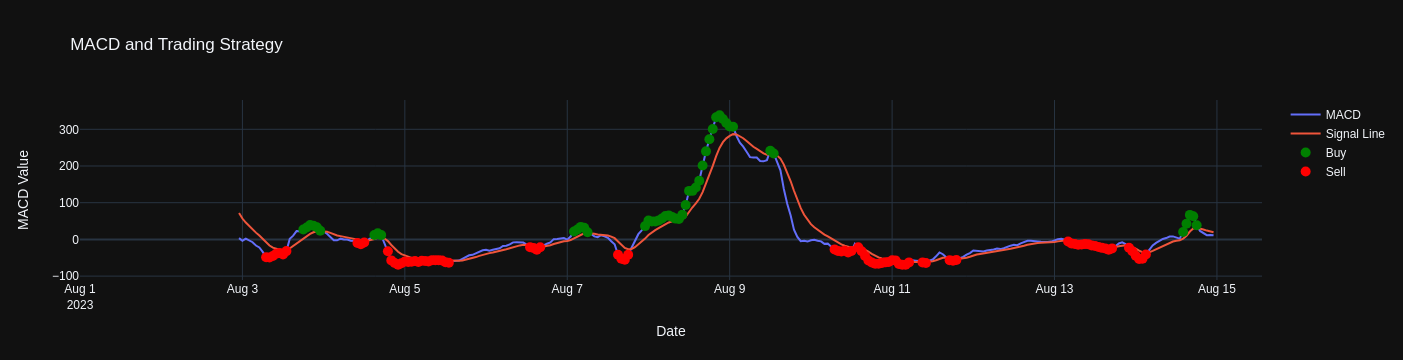

In [231]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and it already has 'date', 'macd', 'macdsignal', and 'Signal' columns
# 'date' column should be in appropriate datetime format

# Create a figure
fig = go.Figure()

# Add MACD line
fig.add_trace(go.Scatter(x=df['date'], y=df['macd'], mode='lines', name='MACD'))

# Add MACD signal line
fig.add_trace(go.Scatter(x=df['date'], y=df['macdsignal'], mode='lines', name='Signal Line'))

# Add Buy signals
buy_signals = df[df['Signal'] == 1]
fig.add_trace(go.Scatter(x=buy_signals['date'], y=buy_signals['macd'], mode='markers', name='Buy', marker=dict(color='green', size=10)))

# Add Sell signals
sell_signals = df[df['Signal'] == -1]
fig.add_trace(go.Scatter(x=sell_signals['date'], y=sell_signals['macd'], mode='markers', name='Sell', marker=dict(color='red', size=10)))

# Update layout
fig.update_layout(title='MACD and Trading Strategy', xaxis_title='Date', yaxis_title='MACD Value', template='plotly_dark')

# Show figure
fig.show()

In [236]:
portfolio = {'BTC': 0, 'USDT': 100_000}
eps = 10_000
portfolios = []
for idx, event in df.iterrows():
    price = event["close"]
    if event["Strategy"] == "Hold":
        pass
    elif portfolio['USDT'] > eps and event["Strategy"] == "Buy":
        btc_amt = eps / price
        usdt_amt = eps
        portfolio['BTC'] += btc_amt
        portfolio['USDT'] -= eps
    elif portfolio['BTC'] > eps / price and event["Strategy"] == "Sell":
        btc_amt = eps / price
        usdt_amt = eps
        portfolio['BTC'] -= btc_amt
        portfolio['USDT'] += usdt_amt
    portfolios.append({"open_time": event["open_time"]} | portfolio | {"value": portfolio["BTC"] * price + portfolio["USDT"]}) # Python3.9 syntax
portfolio = pd.DataFrame(portfolios)

In [237]:
portfolio.tail()

,open_time,BTC,USDT,value
331,1692039600000,1.702196,50000,99977.407292
332,1692043200000,1.702196,50000,100045.988787
333,1692046800000,1.702196,50000,100053.308232
334,1692050400000,1.702196,50000,100109.259430
335,1692054000000,1.702196,50000,100097.224901


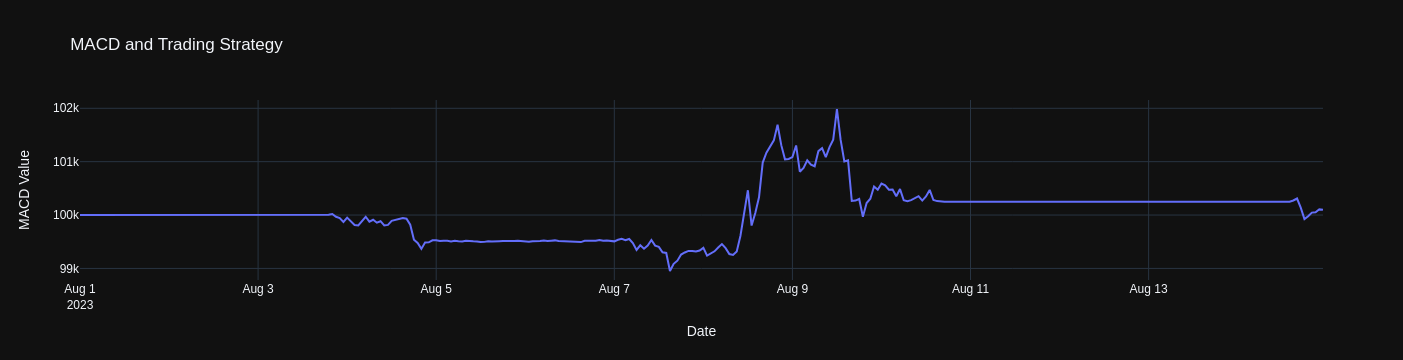

In [238]:
import plotly.graph_objects as go

portfolio['date'] = pd.to_datetime(portfolio['open_time'], unit='ms')
# Create a figure
fig = go.Figure()

# Add MACD line
fig.add_trace(go.Scatter(x=portfolio['date'], y=portfolio['value'], mode='lines', name='portfolio value'))

# Update layout
fig.update_layout(title='MACD and Trading Strategy', xaxis_title='Date', yaxis_title='MACD Value', template='plotly_dark')

# Show figure
fig.show()

In [239]:
from backtest.ffn import (
    calc_return,
    calc_interval_return,
    calc_mdd,
    calc_interval_volatility,
    calc_interval_sharpe_ratio
)

r = calc_interval_return(portfolio, 'open_time','value', '30d')
mdd = calc_mdd(portfolio, 'value')
volatility = calc_interval_volatility(portfolio, 'open_time', 'value', '30d')
sr = calc_interval_sharpe_ratio(portfolio, 'open_time', 'value', '30d')
print(f"Return: {r:.4f}")
print(f"Maximum drawdown: {mdd:.4f}")
print(f"volatility: {volatility:.4f}")
print(f"sharpe_ratio: {sr:.4f}")

Return: 0.0021
Maximum drawdown: 0.0202
volatility: 0.0315
sharpe_ratio: 0.0663


## Parameter Analyze
For MACD method, try to understand the physical meaning of paramters
- Adjust fastperiod: 9 - 16
- Adjust slowperiod: 26 - 32
- Adjust signalperiod: 6 - 10

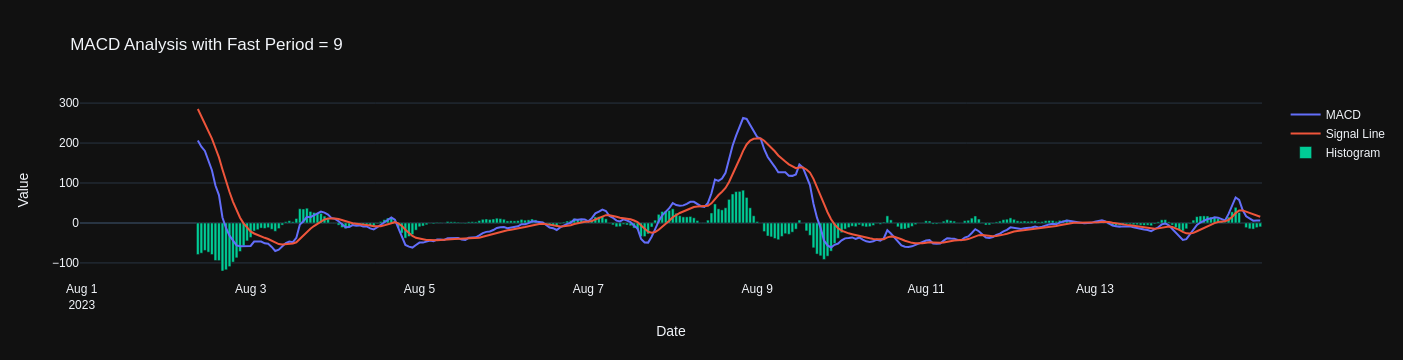

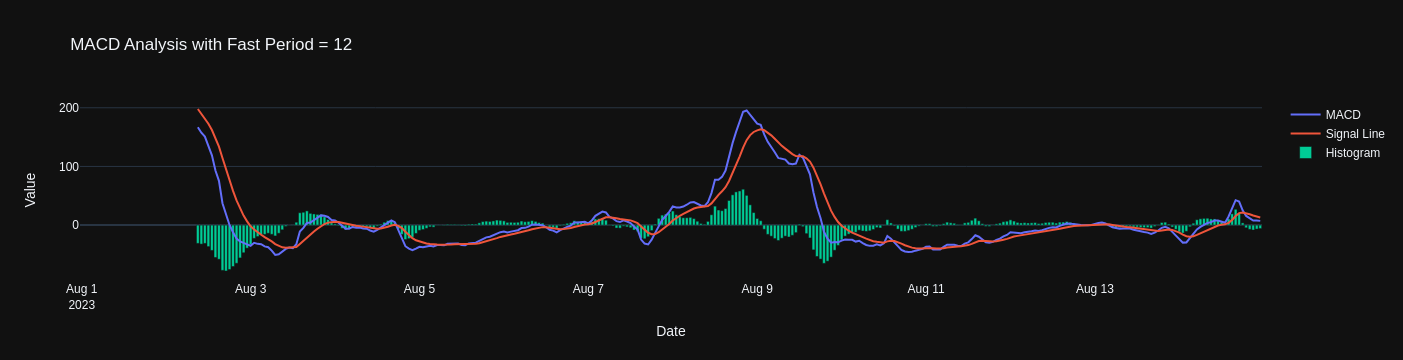

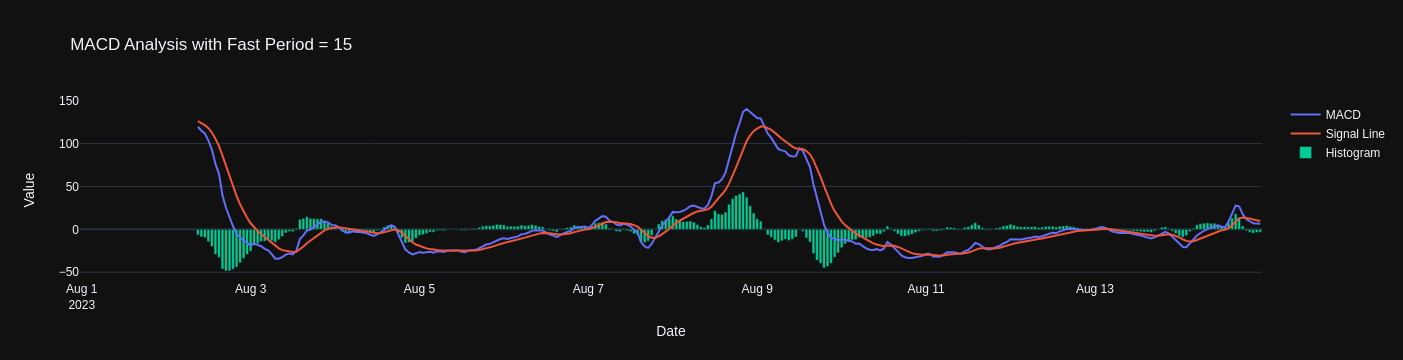

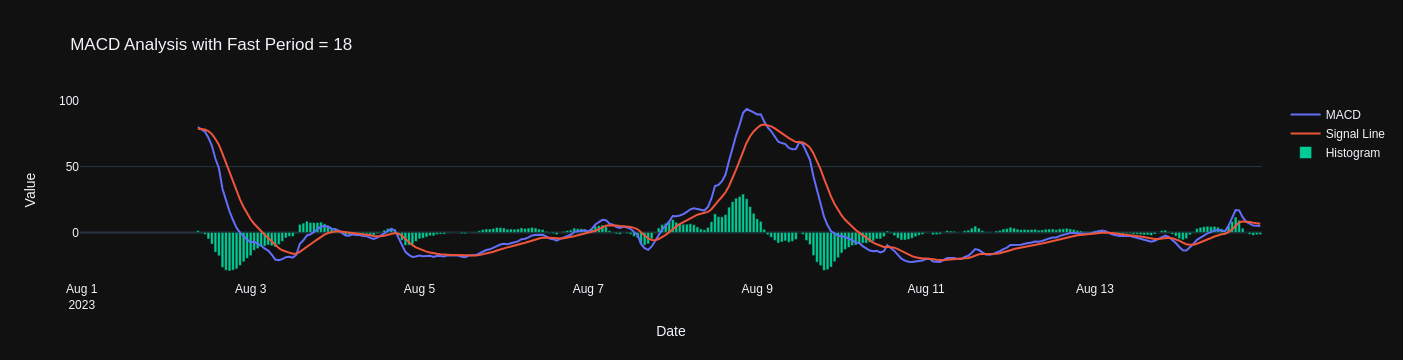

In [240]:
import pandas as pd
import plotly.graph_objects as go
import talib

slow_period = 26
signal_period = 9
fast_periods = range(9, 19, 3)  # Fast period from 9 to 19

for fast_period in fast_periods:
    # Calculate MACD components
    macd, signal, hist = talib.MACD(df['close'], fastperiod=fast_period, slowperiod=slow_period, signalperiod=signal_period)
    
    # Create a Plotly figure
    fig = go.Figure()
    
    # Add MACD line (slow line)
    fig.add_trace(go.Scatter(x=df['date'], y=macd, mode='lines', name='MACD'))
    # Add signal line (fast line)
    fig.add_trace(go.Scatter(x=df['date'], y=signal, mode='lines', name='Signal Line'))
    # Add histogram for the difference
    fig.add_trace(go.Bar(x=df['date'], y=hist, name='Histogram'))
    
    # Update layout
    fig.update_layout(title=f'MACD Analysis with Fast Period = {fast_period}',
                      xaxis_title='Date',
                      yaxis_title='Value',
                      template='plotly_dark')
    
    fig.show()


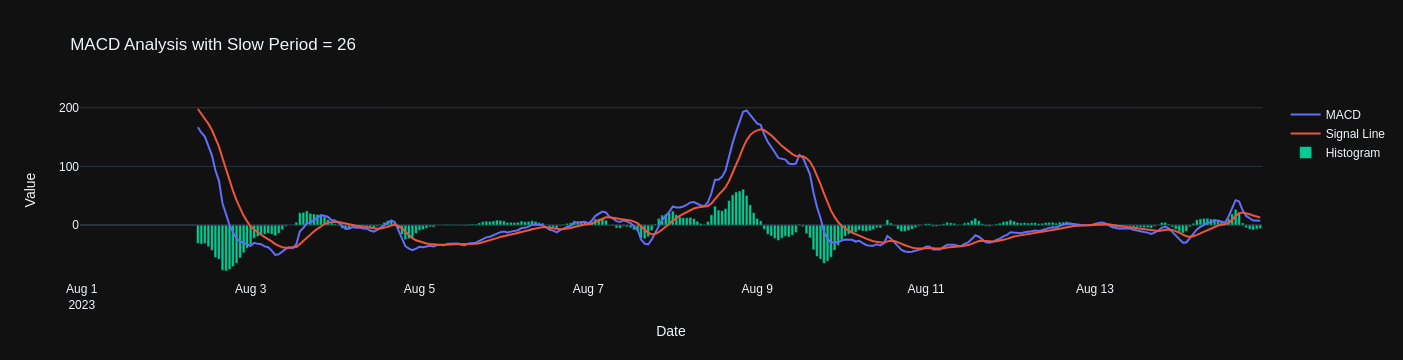

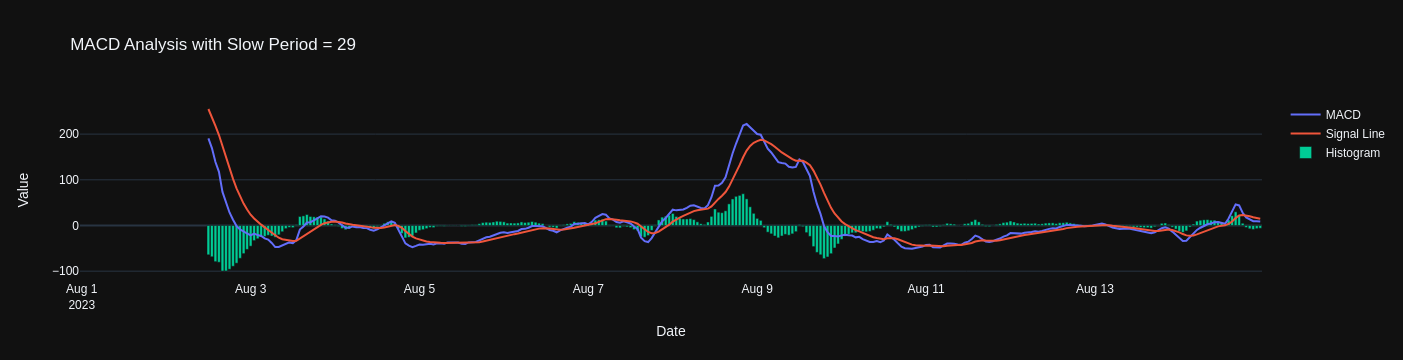

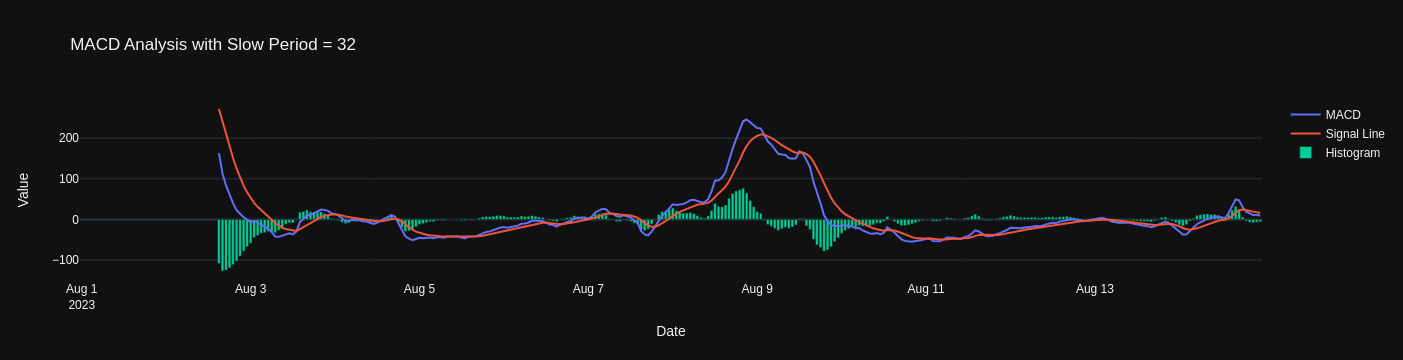

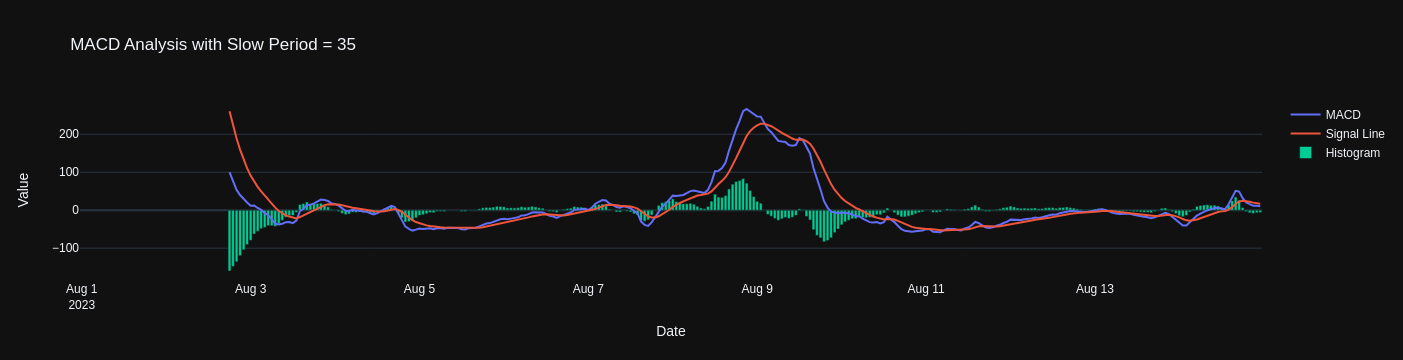

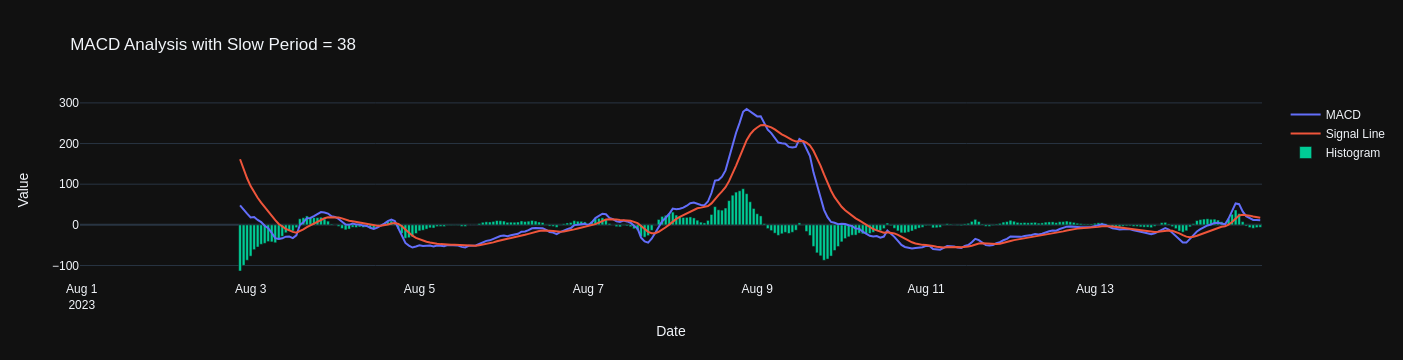

In [241]:
import pandas as pd
import plotly.graph_objects as go
import talib

slow_periods = range(26, 40, 3)
signal_period = 9
fast_period = 12

for slow_period in slow_periods:
    # Calculate MACD components
    macd, signal, hist = talib.MACD(df['close'], fastperiod=fast_period, slowperiod=slow_period, signalperiod=signal_period)
    
    # Create a Plotly figure
    fig = go.Figure()
    
    # Add MACD line (slow line)
    fig.add_trace(go.Scatter(x=df['date'], y=macd, mode='lines', name='MACD'))
    # Add signal line (fast line)
    fig.add_trace(go.Scatter(x=df['date'], y=signal, mode='lines', name='Signal Line'))
    # Add histogram for the difference
    fig.add_trace(go.Bar(x=df['date'], y=hist, name='Histogram'))
    
    # Update layout
    fig.update_layout(title=f'MACD Analysis with Slow Period = {slow_period}',
                      xaxis_title='Date',
                      yaxis_title='Value',
                      template='plotly_dark')
    
    fig.show()

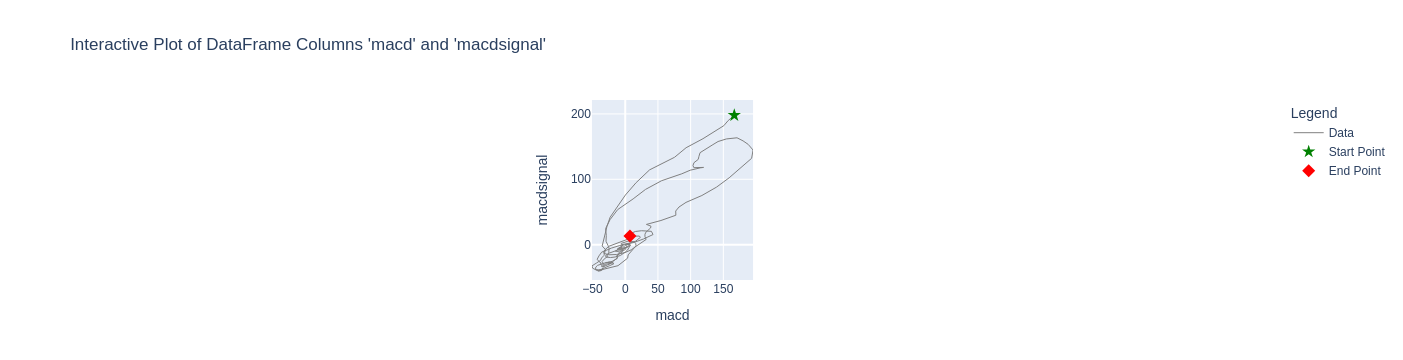

In [271]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'df' is your DataFrame and it's already defined
# df = pd.DataFrame({'macd': [your_data], 'macdsignal': [your_data]})
macd, signal, hist = talib.MACD(df['close'])
macd = macd.dropna()
signal = signal.dropna()
# Create the figure
fig = go.Figure()

# Add scatter plot for data points
fig.add_trace(go.Scatter(x=macd, y=signal, mode='lines', name='Data',
                         line=dict(color='grey', width=1), marker=dict(color='blue')))

# Highlight the starting point with a distinct marker
fig.add_trace(go.Scatter(x=[macd.iloc[0]], y=[signal.iloc[0]],
                         mode='markers', name='Start Point',
                         marker=dict(color='green', size=10, symbol='star')))

# Highlight the ending point with a distinct marker
fig.add_trace(go.Scatter(x=[macd.iloc[-1]], y=[signal.iloc[-1]],
                         mode='markers', name='End Point',
                         marker=dict(color='red', size=10, symbol='diamond')))

# Optionally, adding a direction indicator (arrow) from the second-last to the last point
if len(df) > 1:
    fig.add_annotation(
        x=df['macd'].iloc[-1],
        y=df['macdsignal'].iloc[-1],
        ax=df['macd'].iloc[-2],
        ay=df['macdsignal'].iloc[-2],
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        showarrow=True,
        arrowhead=3,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='red'
    )

# Make the plot isometric
fig.update_layout(
    title='Interactive Plot of DataFrame Columns \'macd\' and \'macdsignal\'',
    xaxis_title='macd',
    yaxis_title='macdsignal',
    legend_title="Legend",
    hovermode='closest',
    xaxis=dict(constrain='domain'),
    yaxis=dict(scaleanchor="x", scaleratio=1),
)

fig.show()
